### Стохастический градиентный спуск (SGD)

В контексте ML вам вряд ли доведется выполнять градиентный спуск так, как мы это делали до этого, когда обучали модель на основе всех обучающих данных (так называемый **пакетный градиентный спуск**). На практике вы скорее всего, будете заниматься **стохастическим градиентным спуском**, который на каждой итерации обучается только на одной выборке из набор данных. При **мини-пакетном градиентном спуске** на каждой итерации используется несколько выборок.

#### Стохастический градиентный спуск для линейной регрессии

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://bit.ly/2KF29Bd', header=0) # header=0 - говорит, что первая строка - это название столбцов

X = data.iloc[:, 0].values # берем первый столбец по позиции
Y = data.iloc[:, 1].values

n = data.shape[0]

m = 0.0
b = 0.0

sample_size = 1
L = 0.0001
epochs = 1_000_000

for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False) # выбор случайного одного индекса строк из диапазона от 0 до n
    x_sample = X[idx]
    y_sample = Y[idx]

    Y_pred = m * x_sample + b

    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)

    m = m - L * D_m
    b = b - L * D_b

    if i % 10000 == 0:
        print(i, m, b)

print(f"y = {m}x + {b}")

0 0.004 0.002
10000 2.3417231117703703 1.8848442576490478
20000 2.2073724378157125 2.8466321330791486
30000 2.085788986582308 3.489208175769213
40000 2.076502807182744 3.9151645266799666
50000 2.0127512844896565 4.197252484829348
60000 1.9778194800785778 4.370413904462686
70000 1.969867671947616 4.4864135282063815
80000 1.9868966398593297 4.577654142776937
90000 1.9369471459362213 4.635100450948883
100000 1.915705397457932 4.676971297347549
110000 1.9476188003768167 4.691224572512755
120000 1.9182794047006697 4.706656121618487
130000 1.934105141884556 4.706291665313748
140000 1.941009477053379 4.723207581809803
150000 1.9504339278589433 4.728095112093571
160000 1.8874538670904868 4.72689880813577
170000 1.963600872828645 4.733542050692565
180000 1.9512102627138783 4.745063701585489
190000 1.9211431508377053 4.745679593407508
200000 1.947186666993085 4.769842125855888
210000 1.9208295101096395 4.761927988445459
220000 1.9243845382934937 4.75681987154712
230000 1.9393527575816403 4.74048

#### Коэффициент корреляции

**Линейный коэффициент корреляции**, который также называется **коэффициентом корреляции Пирсона** и оценивает степень взаимосвязи между двумя переменными в виде значения от -1 до 1.

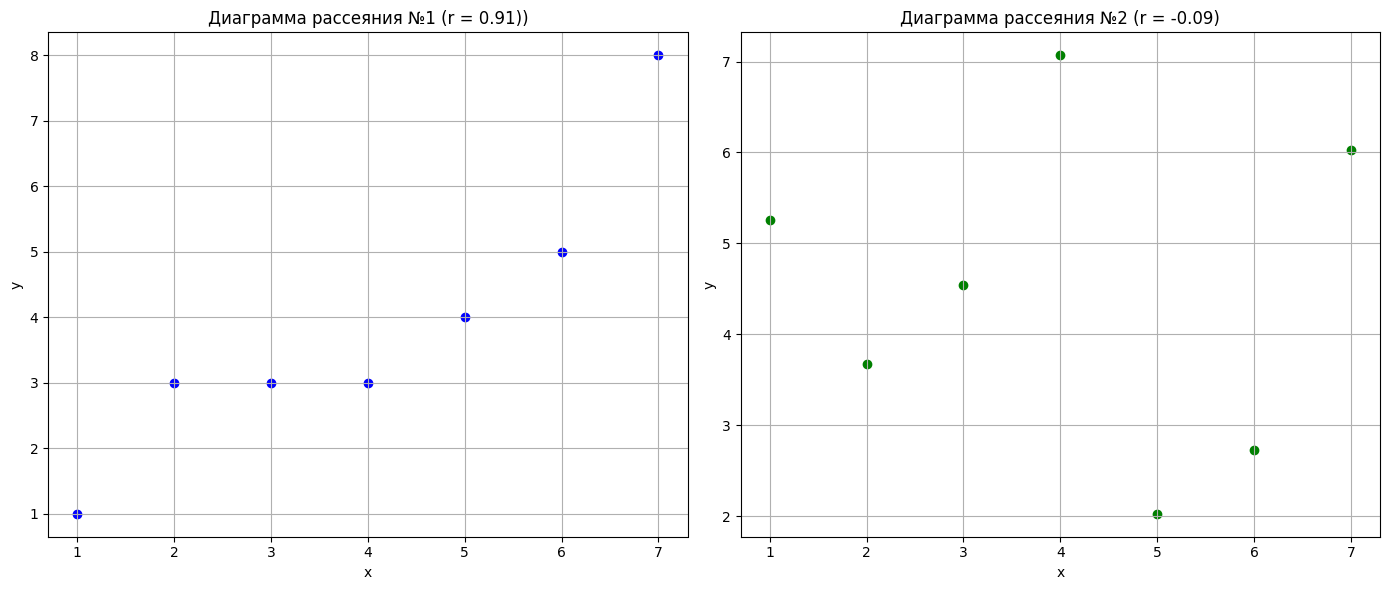

In [29]:
import matplotlib.pyplot as plt
import numpy as np

points = np.array([
    [1, 1], 
    [2, 3],
    [3, 3],
    [4, 3],
    [5, 4],
    [6, 5],
    [7, 8]
    ])

x1 = points[:, 0]
y1 = points[:, 1]
corr1 = np.corrcoef(x1, y1)[0, 1]

np.random.seed(100)
x2 = np.arange(1, 8)
y2 = np.random.uniform(2, 8, size=7)
corr2 = np.corrcoef(x2, y2)[0, 1]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(x1, y1, color='blue')
axs[0].set_title(f'Диаграмма рассеяния №1 (r = {corr1:.2f}))')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].scatter(x2, y2, color='green')
axs[1].set_title(f'Диаграмма рассеяния №2 (r = {corr2:.2f})')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid(True)

plt.tight_layout() # уплотняет расположение элементов, чтобы они не налезали друг на друга
plt.show()

In [14]:
import pandas as pd

df = pd.DataFrame(points)

correlations = df.corr(method='pearson')
print(correlations)


          0         1
0  1.000000  0.914677
1  0.914677  1.000000
